In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
import datetime
import morphoMaths
import pandas as pd
from scipy import io
import metrics
from MaxPlusDecoder.AsymAE_maxPlusDecoder.asymAE_maxplus_NonNeg import NonNeg_AsymAEinfoGAN_MaxPlus_NonNegConstraint

Using TensorFlow backend.


In [2]:
#Loading FashionMNIST
FILE_PATH = "../"
x_train, _, x_test, y_test = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=True, test=True, subsetTest=False)
idx_small = np.arange(10)
idx_small[2]=31
x_small = x_test[idx_small]
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


Original images and reconstructions - Reconstruction error:  0.06837624120712281


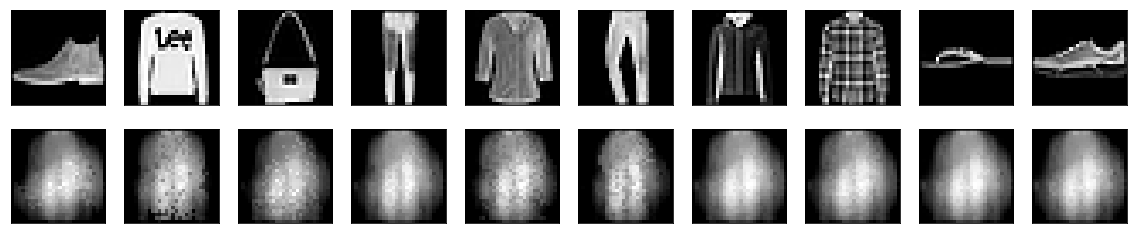

Histograms of the encodings - Sparsity (Hoyer):  0.58542794


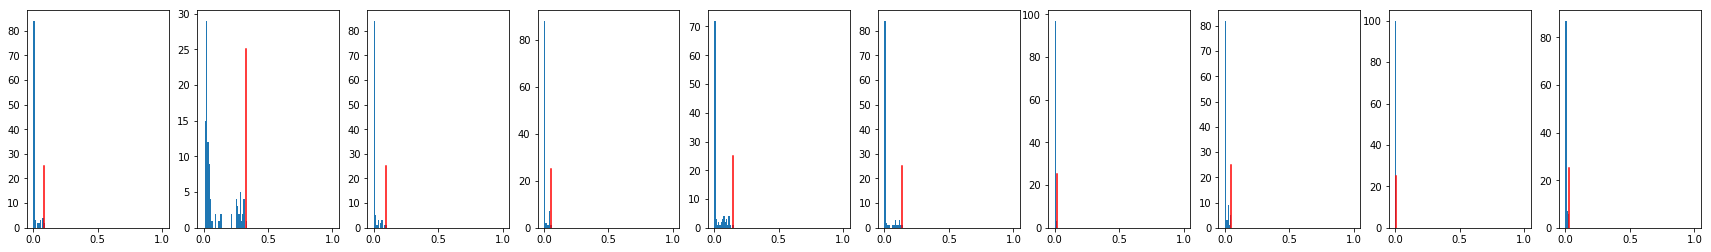

Atom images of the decoder


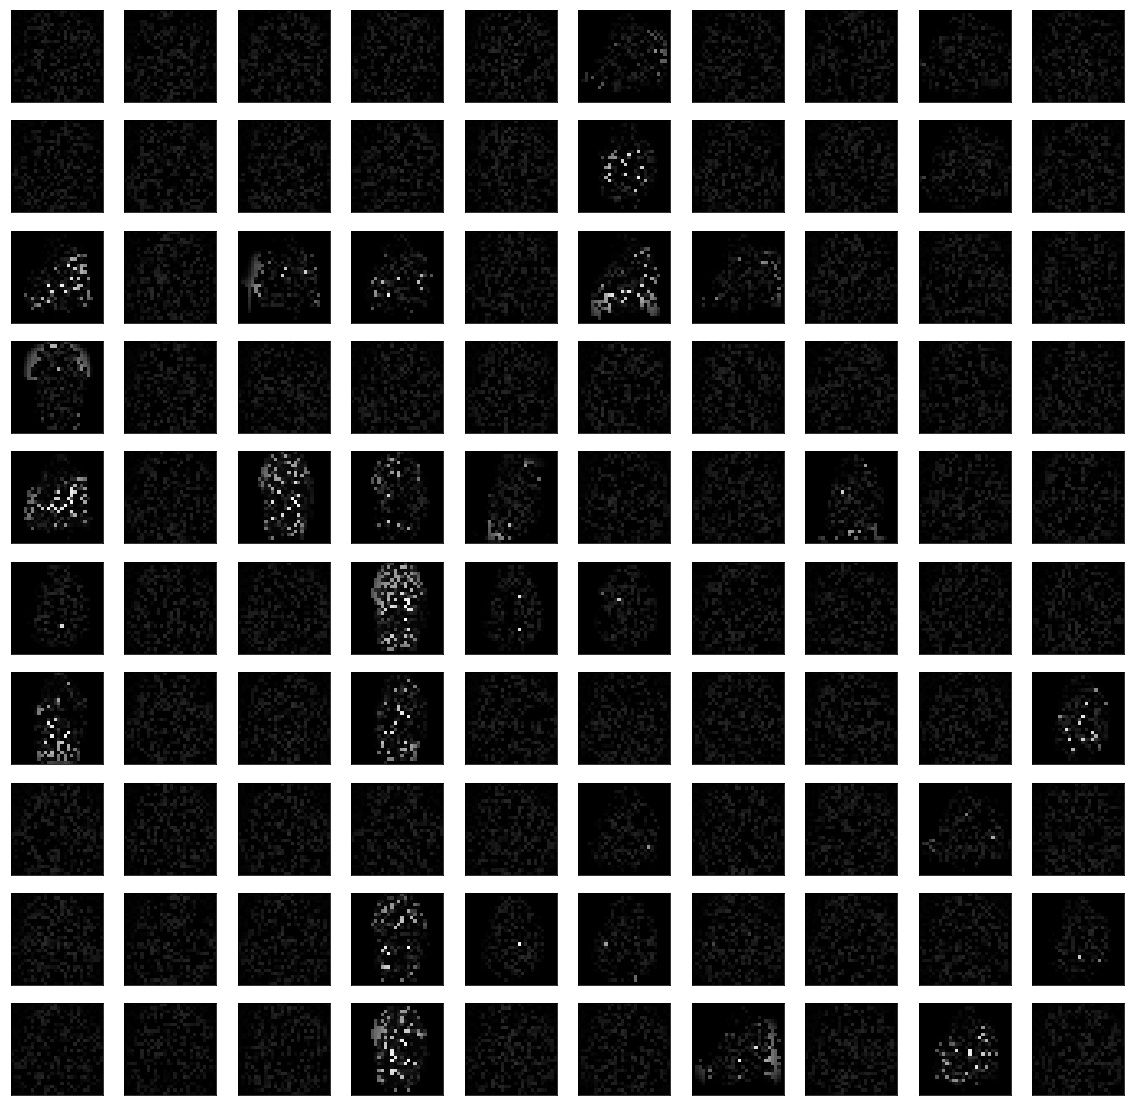

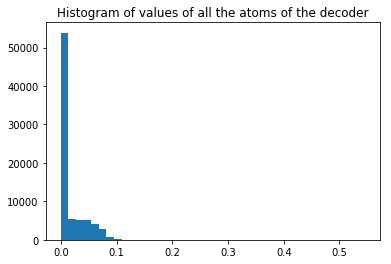

In [3]:
AE = NonNeg_AsymAEinfoGAN_MaxPlus_NonNegConstraint.load('18_12_12_dim100_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', AE.sparsity_measure(x_test))
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=100)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


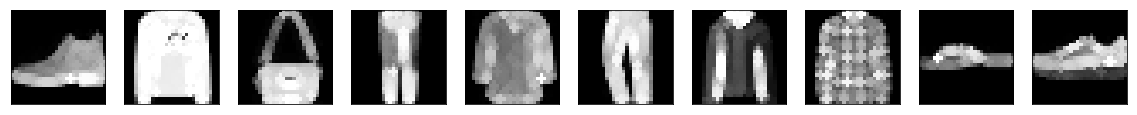

Dilatation of the reconstructions


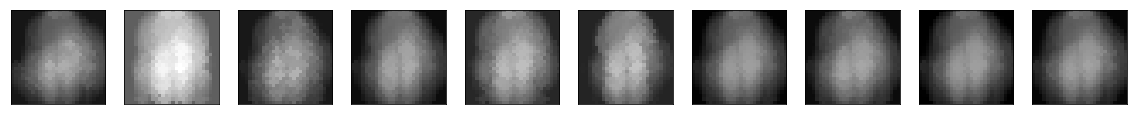

Original images and max-approximation to dilatation
Max-approx error to original:  0.1508978600025177  - Max-approx error to reconstruction:  0.06808458517789841


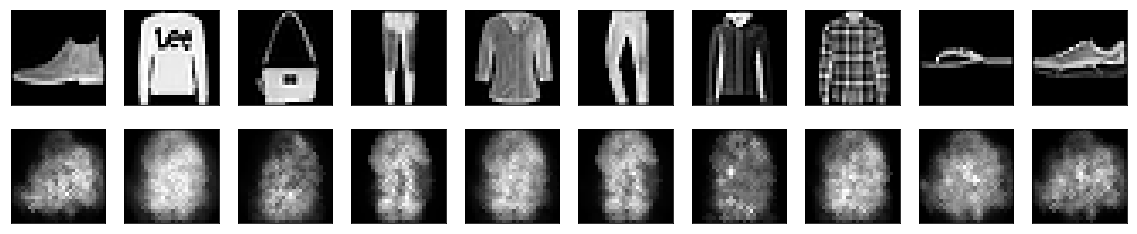

Dilated of the atom images of the decoder


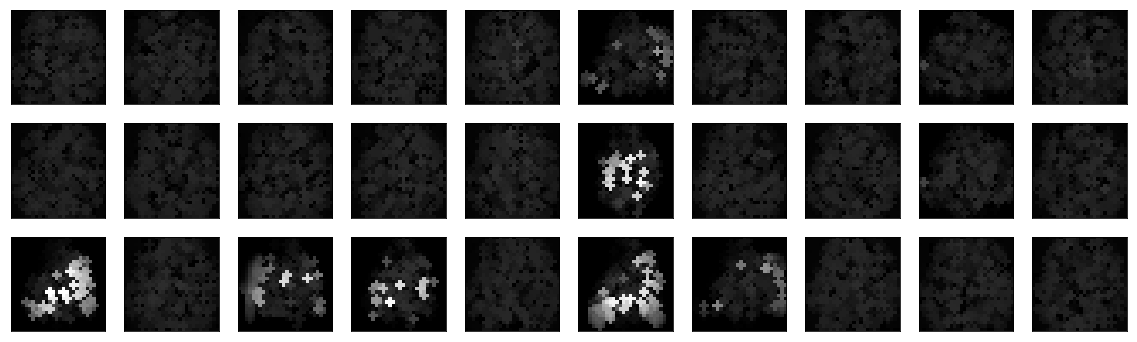

In [4]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
test_max_approx = AE.max_approximation_error(x_test, morphoMaths.dilatation, SE_scale=1)
print('Max-approx error to original: ', test_max_approx[0], ' - Max-approx error to reconstruction: ', test_max_approx[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

In [5]:
AE.reconstruction_error(x_train)

0.06865300702253978

In [6]:
AE.sparsity_measure(x_train)

0.58580697

In [7]:
AE.max_approximation_error(x_train, morphoMaths.dilatation, SE_scale=1)

(0.150630393242836, 0.06779532027641932)

In [8]:
import atoms_analysis

In [9]:
import importlib

In [10]:
atoms_analysis.Hoyer_sparsity_of_atoms(AE.atom_images_decoder())

0.5028697

In [11]:
atoms_analysis.Hoyer_sparsity_of_atoms(AE_dil.atom_images_decoder())

0.23527119

In [12]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(AE.atom_images_decoder(), AE.encode(x_test[:1000]))

0.10233875968054247

In [13]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(AE_dil.atom_images_decoder(), AE_dil.encode(x_test[:1000]))

0.26035589398978864

In [14]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(AE.atom_images_decoder(), AE.encode(x_train[:1000]))

0.10279605581341245

In [15]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(AE_dil.atom_images_decoder(), AE_dil.encode(x_train[:1000]))

0.2612073272813923